In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pymc3 as pm
import time
from pymc3.backends.base import merge_traces
import pandas as pd

In [4]:
data = pd.read_csv("fukushima_wind.csv")

In [5]:
data = np.array(data[2:])

In [6]:
wind = np.sqrt(data[:,1]**2+data[:,0]**2)

In [7]:
wind = wind[:100]

In [8]:
wind

array([ 8.46905258,  8.02053892,  7.45860007,  7.24168379,  8.24440314,
       11.00176593, 11.39765441,  9.62089363,  6.8313465 ,  3.3204711 ,
        1.85477746,  2.79294309,  7.44356625,  6.14624871,  3.80798259,
        1.56191681,  5.29463734,  3.48873282, 10.56783782, 11.14276194,
        9.09908275,  5.43776113,  3.27411258,  5.95872276,  8.4340086 ,
        6.72914047,  4.65397582,  5.53800453,  3.42971013,  4.27080976,
        5.67673016,  3.68930721,  5.47529938,  5.48283167,  5.27254184,
        2.73363036,  4.39548534,  6.89572087,  8.9863889 , 13.25435309,
       11.70184708, 10.42581676, 10.56613832, 11.58370468,  9.88387413,
        8.31082057,  7.23237197,  9.34678903, 10.38740378,  8.85716183,
        7.58750187, 12.29945882, 12.35042243,  9.45831271,  6.55322629,
        5.72405694,  8.15339857,  7.99030996,  6.53245675, 10.06942055,
       11.59331583, 12.97455676, 11.1983805 ,  8.33964503,  5.1461332 ,
        5.96633   ,  6.98978486,  3.49858526,  6.36981472, 10.77

In [10]:
N = 100
T = 100
 
with pm.Model() as model:
    alpha = pm.Uniform(name='alpha',lower=0)
    mu = [0]*N
    mu[0] = wind[0]
    for n in range(1, N):
        mu[n] = pm.Normal(name='mu'+str(n), mu=mu[n-1], sd=alpha)
    
    beta = pm.Uniform(name='beta', lower = 0)
    y_pre = pm.Normal('y_pre', mu=mu, sd = beta, observed=wind)
    
    start = pm.find_MAP()
    step = pm.NUTS()

logp = 617.03, ||grad|| = 2,534.9: 100%|██████████| 3944/3944 [00:11<00:00, 331.92it/s]   


In [11]:
with model :
    trace = pm.sample(T , step ,start = start,njobs = 3,random_seed = range(3),progress_bar = False)
#     print('Rhat= '+str(pm.gelman_rubin(trace)) )
#     pm.traceplot(trace,model.vars)

Only 100 samples in chain.
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [beta, mu99, mu98, mu97, mu96, mu95, mu94, mu93, mu92, mu91, mu90, mu89, mu88, mu87, mu86, mu85, mu84, mu83, mu82, mu81, mu80, mu79, mu78, mu77, mu76, mu75, mu74, mu73, mu72, mu71, mu70, mu69, mu68, mu67, mu66, mu65, mu64, mu63, mu62, mu61, mu60, mu59, mu58, mu57, mu56, mu55, mu54, mu53, mu52, mu51, mu50, mu49, mu48, mu47, mu46, mu45, mu44, mu43, mu42, mu41, mu40, mu39, mu38, mu37, mu36, mu35, mu34, mu33, mu32, mu31, mu30, mu29, mu28, mu27, mu26, mu25, mu24, mu23, mu22, mu21, mu20, mu19, mu18, mu17, mu16, mu15, mu14, mu13, mu12, mu11, mu10, mu9, mu8, mu7, mu6, mu5, mu4, mu3, mu2, mu1, alpha]
Sampling 3 chains: 100%|██████████| 1800/1800 [03:50<00:00,  2.86draws/s]
The acceptance probability does not match the target. It is 0.9654921014596249, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparam

KeyError: 'Unknown variable y_pre'

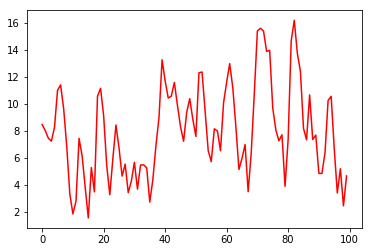

In [33]:
plt.plot(np.linspace(0,99,100),wind,color='red')
plt.plot(np.linspace(0,99,100),trace["y_pre"])
plt.show()

In [27]:
mu = np.array([trace['mu'+str(i)] for i in range(1,100)])

In [34]:
trace['alpha']

array([3.22023786e-06, 3.44642184e-06, 3.72296671e-06, 3.16968417e-06,
       2.96436331e-06, 2.75575471e-06, 3.10463577e-06, 3.12400627e-06,
       2.96305243e-06, 3.05244866e-06, 2.75350900e-06, 2.79533797e-06,
       2.95958392e-06, 3.70900328e-06, 3.33338564e-06, 3.75901654e-06,
       4.01642406e-06, 3.64319049e-06, 3.69046899e-06, 3.60052947e-06,
       3.26831406e-06, 3.62162130e-06, 3.43343055e-06, 3.98940510e-06,
       3.49710533e-06, 3.79090860e-06, 4.35964872e-06, 5.61450443e-06,
       5.10783550e-06, 4.80263171e-06, 4.54474648e-06, 5.12103837e-06,
       6.33216782e-06, 5.07155370e-06, 4.47832071e-06, 3.85185665e-06,
       4.00298494e-06, 4.37684103e-06, 5.62326743e-06, 4.57842574e-06,
       4.56224523e-06, 4.54395257e-06, 4.18215917e-06, 5.41790029e-06,
       4.94797599e-06, 5.04488383e-06, 5.53557130e-06, 4.86280215e-06,
       6.13924115e-06, 6.76848243e-06, 7.04434418e-06, 6.34930160e-06,
       7.10983947e-06, 8.06785690e-06, 7.16131107e-06, 9.13098972e-06,
      

In [40]:
a = np.array([[2,1],[1,2]]).astype('int32')

In [46]:
b = np.linalg.inv(a)

In [47]:
b

array([[ 0.66666667, -0.33333333],
       [-0.33333333,  0.66666667]])